# Stock Market Prediction And Forecasting Using Stacked LSTM

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [32]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [33]:
data.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [34]:
data['Date'] = pd.to_datetime(data['Date'])


In [35]:
df = data.sort_values('Date')
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [36]:
df.reset_index(inplace=True)

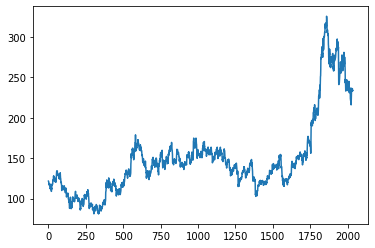

In [37]:
plt.plot(df['Close'])

In [38]:
scaler = MinMaxScaler(feature_range=(0,1))

In [39]:
df_close = scaler.fit_transform(np.array(df['Close']).reshape(-1,1))
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [40]:
training_size = int(len(df_close)*0.70)
test_size = len(df_close) - training_size
train, test = df_close[0: training_size,:], df_close[training_size : len(df_close),:1]

In [41]:
def create_mat(ds, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [42]:
time_step = 100
X_train, y_train = create_mat(train, time_step)
X_test, y_test = create_mat(test, time_step)

In [43]:
X_train.shape

(1323, 100)

In [44]:
y_train.shape

(1323,)

In [45]:
X_test.shape

(510, 100)

In [46]:
y_test.shape

(510,)

In [47]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [49]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(X_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)


Epoch 1/60
19/19 [==============================] - 7s 388ms/step - loss: 0.0124 - val_loss: 0.0012
Epoch 2/60
19/19 [==============================] - 5s 287ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 3/60
19/19 [==============================] - 5s 286ms/step - loss: 9.6541e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 5s 286ms/step - loss: 8.8284e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 5s 285ms/step - loss: 8.2942e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 5s 274ms/step - loss: 8.5252e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 5s 279ms/step - loss: 8.1360e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 5s 279ms/step - loss: 8.3347e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 5s 281ms/step - loss: 7.4881e-04 - val_loss: 0.0011
Epoch 10/60
19/19 [==============================] - 5s 275ms/step - los

In [26]:
predictions = model.predict(X_test)

In [27]:
inv_predictions = scaler.inverse_transform(predictions)

In [28]:
inv_predictions

array([[144.49759 ],
       [144.63477 ],
       [143.59503 ],
       [140.66797 ],
       [139.05371 ],
       [138.7757  ],
       [140.31512 ],
       [142.05182 ],
       [142.23328 ],
       [141.53168 ],
       [141.12138 ],
       [142.4672  ],
       [143.37573 ],
       [145.08647 ],
       [147.42471 ],
       [144.94972 ],
       [142.1909  ],
       [142.04439 ],
       [143.08565 ],
       [148.86679 ],
       [153.52196 ],
       [155.23679 ],
       [154.93561 ],
       [152.3049  ],
       [152.27032 ],
       [152.4199  ],
       [153.17795 ],
       [155.17711 ],
       [155.84842 ],
       [155.5722  ],
       [155.80984 ],
       [154.40811 ],
       [150.79982 ],
       [144.70729 ],
       [141.4821  ],
       [141.0402  ],
       [141.5751  ],
       [140.63022 ],
       [137.82399 ],
       [133.62434 ],
       [130.99324 ],
       [129.99956 ],
       [127.97857 ],
       [127.24421 ],
       [125.12209 ],
       [122.341545],
       [121.71105 ],
       [121.5

In [29]:
import math
from sklearn.metrics import mean_squared_error

In [30]:
mse = math.sqrt(mean_squared_error(y_test, predictions))
print("The Mean Squared Error for above model is: ", mse)

The Mean Squared Error for above model is:  0.034137920342684085
